In [11]:
# import standard libraries
import glob
import os
# import third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlf import read_patent_file

In [3]:
filepaths = glob.glob('data/patents/raw/*.gz')
data = [read_patent_file(f) for f in filepaths]

In [4]:
# read all dataframes in one big dataframe
data_all = pd.concat(data, axis=0)

# Exploratory data analysis

In [5]:
data_all.dropna(how='all', inplace=True, axis=1)

In [6]:
numeric_col = ['cited_patent_number', 'citedby_patent_number', 'num_inventor',
              'patent_num_claims', 'patent_processing_time']

In [12]:
# change type of certain columns
data_all[numeric_col] = data_all[numeric_col].astype(np.float64)

In [8]:
data_all.shape

(11098, 20)

In [9]:
data_missing = data_all.isna().sum()
data_missing = data_missing[data_missing > 0]
pd.DataFrame(data = data_missing, columns=['#nan'])

,#nan
cpc_group_title,532
cpc_subgroup_title,532
cpc_subsection_title,532
nber_subcategory_title,7742
patent_abstract,360
uspc_mainclass_title,3319
uspc_subclass_title,7548
wipo_field_title,534
wipo_sector_title,534


Most features that have nan values are actually text cells, all the rest seems good. Let's concantenate all text info together for some NLP

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'num_inventor'

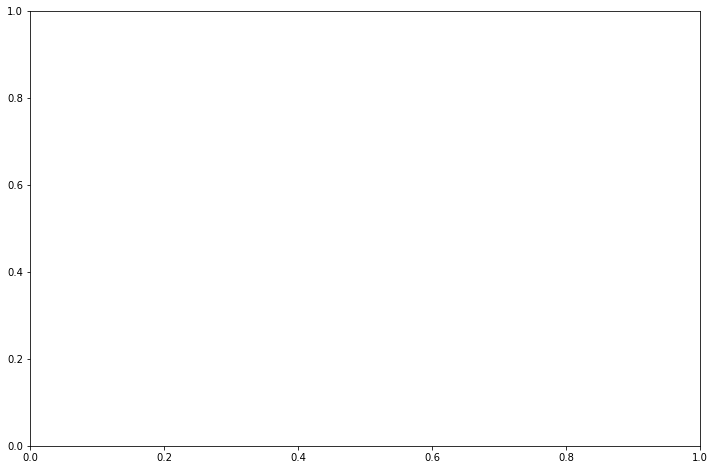

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(data_all, x='num_inventor')

In [24]:
data_all

,app_date,app_number,assignee_organization,cited_patent_number,citedby_patent_number,cpc_group_title,cpc_subgroup_title,cpc_subsection_title,num_inventor,nber_subcategory_title,patent_abstract,patent_date,patent_num_claims,patent_number,patent_processing_time,patent_title,uspc_mainclass_title,uspc_subclass_title,wipo_field_title,wipo_sector_title
0,2012-07-25,14234648,GlaxoSmithKline Biologicals SA,1,1,"Preparations for medical, dental, or toilet pu...",Medicinal preparations containing antigens or ...,Medical or veterinary science; hygiene Medical...,2.0,NaN,The present invention is directed to mutant pa...,2018-07-24,6,10030052,2190,Parvovirus Vp1 unique region polypeptides and ...,NaN,NaN,Pharmaceuticals Biotechnology Analysis of biol...,Chemistry Chemistry Instruments
1,2012-07-19,14234070,GlaxoSmithKline LLC,19,1,"Preparations for medical, dental, or toilet pu...",Medicinal preparations characterised by specia...,Medical or veterinary science; hygiene Medical...,2.0,NaN,"Compound (I), and pharmaceutically acceptable ...",2018-10-30,2,10112946,2294,Composition,NaN,NaN,Pharmaceuticals Organic fine chemistry,Chemistry Chemistry
2,2012-02-09,13984536,GlaxoSmithKline LLC,1,1,"Preparations for medical, dental, or toilet pu...",Medicinal preparations containing peptides -Pe...,Medical or veterinary science; hygiene Medical...,2.0,NaN,The invention is directed to a method for prod...,2019-05-14,16,10286037,2651,Methods of producing lyophilized polypeptide c...,NaN,NaN,Biotechnology Pharmaceuticals,Chemistry Chemistry
3,2012-01-27,13982042,GlaxoSmithKline Biologicals SA,3,1,"Preparations for medical, dental, or toilet pu...",Medicinal preparations containing antigens or ...,Medical or veterinary science; hygiene Medical...,3.0,NaN,High loading of lipophilic pharmacological age...,2019-05-14,12,10286056,2664,Adjuvant nanoemulsions with crystallisation in...,NaN,NaN,Pharmaceuticals,Chemistry
4,2012-01-26,13982206,GlaxoSmithKline Biologicals SA,6,1,"Preparations for medical, dental, or toilet pu...",Medicinal preparations containing antigens or ...,Medical or veterinary science; hygiene Medical...,1.0,NaN,The invention relates to an immunization regim...,2019-07-09,20,10342862,2721,RSV immunization regimen,NaN,NaN,Pharmaceuticals,Chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2016-09-09,15260888,"Alexion Pharmaceuticals, Inc.",6,5,"Preparations for medical, dental, or toilet pu...",Medicinal preparations characterised by specia...,Medical or veterinary science; hygiene Medical...,3.0,NaN,"Eculizumab, a humanized monoclonal antibody ag...",2017-08-08,10,9725504,333,Treatment of paroxysmal nocturnal hemoglobinur...,No longer published,NaN,Pharmaceuticals Biotechnology,Chemistry Chemistry
12,2016-10-03,15284015,"Alexion Pharmaceuticals, Inc.",6,5,"Preparations for medical, dental, or toilet pu...",Medicinal preparations characterised by specia...,Medical or veterinary science; hygiene Medical...,3.0,NaN,"Eculizumab, a humanized monoclonal antibody ag...",2017-08-15,1,9732149,316,Treatment of paroxysmal nocturnal hemoglobinur...,No longer published,NaN,Pharmaceuticals Biotechnology,Chemistry Chemistry
13,2016-08-22,15243290,"Alexion Pharmaceuticals, Inc.",14,1,"Preparations for medical, dental, or toilet pu...",Medicinal preparations characterised by specia...,Medical or veterinary science; hygiene Medical...,4.0,NaN,"The present disclosure relates to, inter alia,...",2017-09-26,4,9771418,400,Methods for treating complement-associated dis...,No longer published,NaN,Pharmaceuticals Biotechnology,Chemistry Chemistry
14,2016-12-20,15384788,"Alexion Pharmaceuticals, Inc.",18,2,"Preparations for medical, dental, or toilet pu...",Medicinal preparations containing antigens or ...,Medical or veterinary science; hygiene Medical...,2.0,NaN,"The present disclosure relates to, inter alia,...",2018-03-27,13,9925262,462,Kits comprising formulations of anti-C5 antibo...,No longer published,NaN,Pharmaceu